In [1]:
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(palette='crest')

In [4]:
movies = pd.read_csv('../datasets/ml-latest/movies.csv')
ratings = pd.read_csv('../datasets/ml-latest/ratings.csv')

In [5]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [6]:
movies.shape

(86537, 3)

In [7]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,1.225735e+09
1,1,110,4.0,1.225865e+09
2,1,158,4.0,1.225734e+09
3,1,260,4.5,1.225735e+09
4,1,356,5.0,1.225735e+09


In [8]:
ratings.shape

(17783721, 4)

In [9]:
print(f"Total number of unique users: {ratings.userId.nunique()}")

Total number of unique users: 174683


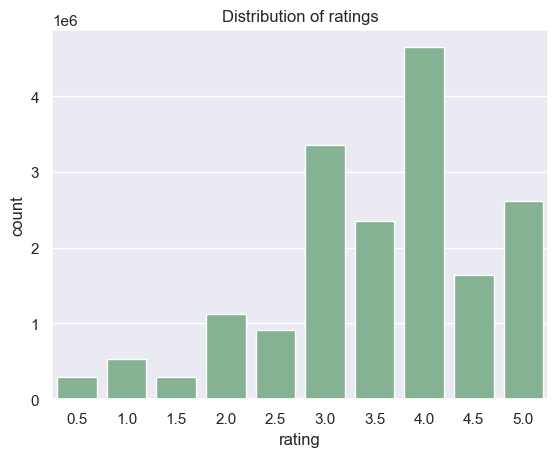

In [10]:
sns.countplot(data=ratings, x='rating')
plt.title("Distribution of ratings")
plt.show()

In [11]:
ratings.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    1
dtype: int64

In [12]:
ratings = ratings.dropna()
ratings.shape

(17783720, 4)

In [13]:
ratings.duplicated().sum()

0

In [14]:
# extract hour from timestamp
ratings['hour'] = ratings['timestamp'].apply(lambda x: datetime.fromtimestamp(x).hour)
ratings = ratings.drop(columns=['timestamp'])
ratings.head()

,userId,movieId,rating,hour
0,1,1,4.0,23
1,1,110,4.0,11
2,1,158,4.0,23
3,1,260,4.5,23
4,1,356,5.0,23


In [15]:
movies.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

In [16]:
movies.duplicated().sum()

0

In [17]:
movies['genres'] = movies['genres'].str.split("|")
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]"
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]"
2,3,Grumpier Old Men (1995),"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]"
4,5,Father of the Bride Part II (1995),[Comedy]


In [18]:
# convert to long form
movies = movies.explode('genres')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure
0,1,Toy Story (1995),Animation
0,1,Toy Story (1995),Children
0,1,Toy Story (1995),Comedy
0,1,Toy Story (1995),Fantasy


In [19]:
m = movies.pivot(index='movieId', columns='genres', values='title')
m.head()

genres,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movieId,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,Toy Story (1995),Toy Story (1995),Toy Story (1995),Toy Story (1995),NaN,NaN,NaN,Toy Story (1995),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,Jumanji (1995),NaN,Jumanji (1995),NaN,NaN,NaN,NaN,Jumanji (1995),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,Grumpier Old Men (1995),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Grumpier Old Men (1995),NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,Waiting to Exhale (1995),NaN,NaN,Waiting to Exhale (1995),NaN,NaN,NaN,NaN,NaN,NaN,Waiting to Exhale (1995),NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,Father of the Bride Part II (1995),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
m = ~m.isna()
m.head()

genres,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movieId,,,,,,,,,,,,,,,,,,,,
1,False,False,True,True,True,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False
2,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False
4,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False
5,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [21]:
m = m.astype(int)
m.loc[1]

genres
(no genres listed)    0
Action                0
Adventure             1
Animation             1
Children              1
Comedy                1
Crime                 0
Documentary           0
Drama                 0
Fantasy               1
Film-Noir             0
Horror                0
IMAX                  0
Musical               0
Mystery               0
Romance               0
Sci-Fi                0
Thriller              0
War                   0
Western               0
Name: 1, dtype: int32

In [22]:
m = m.drop(columns=['(no genres listed)'])

In [23]:
users = pd.DataFrame(ratings.userId.unique().tolist(), columns=['userId'])
users.sample(2)

,userId
23288,23289
4809,4810


In [24]:
users = users.merge(ratings.groupby('userId')['rating'].mean().reset_index(), on='userId')
users = users.merge(ratings.groupby('userId')['hour'].mean().reset_index(), on='userId')
users.head(2)

,userId,rating,hour
0,1,4.008065,18.532258
1,2,3.527473,0.000000


In [25]:
## users.to_csv("../datasets/ml-latest/users.csv")

In [23]:
users = users.set_index('userId')
users.columns = ['avg_rating', 'avg_hour']
users.head()

,avg_rating,avg_hour
userId,,
1,4.008065,18.532258
2,3.527473,0.000000
3,4.900000,0.000000
4,4.366667,9.133333
5,3.418605,10.139535


In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
scaler = StandardScaler()

u = pd.DataFrame(scaler.fit_transform(users), columns=users.columns, index=users.index)
u.head()

,avg_rating,avg_hour
userId,,
1,0.517114,1.104679
2,-0.278786,-1.596991
3,1.994232,-1.596991
4,1.110988,-0.265515
5,-0.459081,-0.118829


In [26]:
X = ratings[['movieId', 'userId', 'rating']].copy()
# merge users data
X = X.merge(u.reset_index(), on='userId')
X = X.merge(m.reset_index(), on='movieId')

X.head()

,movieId,userId,rating,avg_rating,avg_hour,Action,Adventure,Animation,Children,Comedy,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,1,4.0,0.517114,1.104679,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,1,2,5.0,-0.278786,-1.596991,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,1,7,4.0,-0.590260,-0.285836,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,1,10,3.0,-0.395842,1.427536,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,1,12,5.0,-0.188785,1.464432,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [27]:
X = X.drop(columns=['movieId', 'userId'])
y = X.pop('rating')

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=66)

In [2]:
# import regression models
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error as mse
from time import time

In [94]:
# train and test regressor models
tik = time()
time_taken = []
scores = []

for model in [XGBRegressor(), AdaBoostRegressor(), GradientBoostingRegressor()]:
    # fit model
    model.fit(X_train, y_train)
    # predict
    y_pred = model.predict(X_test)
    # rmse score
    score = mse(y_test, y_pred)**0.5
    time_ = time() - tik
    print("Time taken", time_)
    scores.append(score)
    time_taken.append(time_)
    tik = time()

model_df = pd.DataFrame(['XGBRegressor', 'AdaBoostRegressor', 'GradientBoostingRegressor'], columns=['Models'])
model_df['Time Taken'] = time_taken
model_df['Score'] = scores
    
model_df

Time taken 135.03982496261597
Time taken 447.9076027870178
Time taken 2436.5798354148865


,Models,Time Taken,Score
0,XGBRegressor,135.039825,0.911351
1,AdaBoostRegressor,447.907603,0.948309
2,GradientBoostingRegressor,2436.579835,0.922286


In [95]:
model_df['Time Taken'] = np.round(model_df['Time Taken']/60, 2)
model_df

,Models,Time Taken,Score
0,XGBRegressor,2.25,0.911351
1,AdaBoostRegressor,7.47,0.948309
2,GradientBoostingRegressor,40.61,0.922286


In [32]:
best_params = {'learning_rate': 0.04, 'max_depth': 5, 'n_estimators': 180, 'subsample': 0.88, 'tree_method': 'gpu_hist', 'device': 'cuda'}
tik = time()
# initialize xgbregressor with best parameters
xgb_reg = XGBRegressor(**best_params)
# fit to train data
xgb_reg.fit(X_train, y_train)
# predict test data
y_pred = xgb_reg.predict(X_test)

print(f"RMSE: {mse(y_test, y_pred)**0.5}")
print(f"Time taken to complete: {round(time() - tik, 2)}")

RMSE: 0.9189674909543483
Time taken to complete: 89.32


In [35]:
xgb_reg.predict(u.loc[1]._append(m.loc[2223]).values.reshape((1, -1)))

array([3.856528], dtype=float32)

In [35]:
from sklearn.model_selection import RandomizedSearchCV
import scipy.stats as stats

In [42]:
# Define the hyperparameter distributions
param_dist = {
    'max_depth': stats.randint(3, 10),
    'learning_rate': stats.uniform(0.01, 0.1),
    'subsample': stats.uniform(0.5, 0.5),
    'n_estimators':stats.randint(50, 200)
}

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(xgb_reg, param_distributions=param_dist, n_iter=7, cv=5, scoring='neg_mean_squared_error', verbose=4)

# Fit the RandomizedSearchCV object to the training data
random_search.fit(X_train, y_train)

# Print the best set of hyperparameters and the corresponding score
print("Best set of hyperparameters: ", random_search.best_params_)
print("Best score: ", random_search.best_score_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV 1/5] END learning_rate=0.04289060918150059, max_depth=4, n_estimators=116, subsample=0.6088164817256618;, score=-0.852 total time= 2.5min
[CV 2/5] END learning_rate=0.04289060918150059, max_depth=4, n_estimators=116, subsample=0.6088164817256618;, score=-0.854 total time= 2.4min
[CV 3/5] END learning_rate=0.04289060918150059, max_depth=4, n_estimators=116, subsample=0.6088164817256618;, score=-0.855 total time= 2.4min
[CV 4/5] END learning_rate=0.04289060918150059, max_depth=4, n_estimators=116, subsample=0.6088164817256618;, score=-0.853 total time= 2.4min
[CV 5/5] END learning_rate=0.04289060918150059, max_depth=4, n_estimators=116, subsample=0.6088164817256618;, score=-0.853 total time= 2.4min
[CV 1/5] END learning_rate=0.09356954214279399, max_depth=3, n_estimators=132, subsample=0.5886643293624747;, score=-0.849 total time= 2.3min
[CV 2/5] END learning_rate=0.09356954214279399, max_depth=3, n_estimators=132, subsample

In [43]:
# random_search.best_estimator_.fit(X_train, y_train)

y_pred = random_search.best_estimator_.predict(X_test)

print(f"RMSE: {mse(y_test, y_pred)**0.5}")

RMSE: 0.9188541378241666


In [3]:
import joblib

In [34]:
# save the model and scaler
xgb_reg.save_model("xgboost_reg.json")

joblib.dump(scaler, "std_scaler.bin")

['std_scaler.bin']

In [121]:
ratings[ratings['userId'] == 1].groupby('userId')[['rating', 'hour']].agg('mean')

,rating,hour
userId,,
1,4.008065,18.532258


In [5]:
xgb_reg = XGBRegressor()
xgb_reg.load_model("../models/regression_models/xgboost_reg.json")
xgb_reg

XGBRegressor(base_score='3.5447202E0', booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None,
             feature_types=['float', 'float', 'int', 'int', 'int', 'int', 'int',
                            'int', 'int', 'int', 'int', 'int', 'int', 'int',
                            'int', 'int', 'int', 'int', 'int'...
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [7]:
std_scaler = joblib.load("../models/regression_models/std_scaler.bin")
std_scaler

StandardScaler()

In [14]:
users = pd.read_csv("../datasets/ml-latest/users.csv")
# users = users.drop(columns=['Unnamed: 0'])
users.head()

,userId,rating,hour
0,1,4.008065,18.532258
1,2,3.527473,0.000000
2,3,4.900000,0.000000
3,4,4.366667,9.133333
4,5,3.418605,10.139535


In [15]:
users = users.set_index('userId')

In [78]:
user_vector = std_scaler.transform(np.array(users.loc[66]).reshape(1, -1))
user_vector

array([[-0.2684601 ,  0.73552157]])

In [41]:
movies = pd.read_csv("../datasets/ml-latest/movies.csv")
movies['genres'] = movies.genres.str.split("|")
movies = movies.explode('genres')
movies = movies.pivot(index='movieId', columns='genres', values='title')
movies = movies.drop(columns=['(no genres listed)'])
movies = ~movies.isna()
movies = movies.astype(int)
movies.head()

genres,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movieId,,,,,,,,,,,,,,,,,,,
1,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [79]:
random_movie_vectors = movies.sample(n=100).values
random_movie_vectors

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [94]:
user_movie = np.concatenate((np.tile(user_vector, (100, 1)), random_movie_vectors), axis=1)
user_movie = np.concatenate((user_vector.repeat(len(random_movie_vectors), axis=0), random_movie_vectors), axis=1)
user_movie

array([[-0.2684601 ,  0.73552157,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.2684601 ,  0.73552157,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.2684601 ,  0.73552157,  1.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.2684601 ,  0.73552157,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       [-0.2684601 ,  0.73552157,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.2684601 ,  0.73552157,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [95]:
preds = xgb_reg.predict(user_movie)
preds

array([3.6769829, 3.3566415, 3.4565773, 3.40252  , 3.6658313, 3.3990033,
       3.3508618, 3.3917267, 3.6769829, 3.3508618, 3.6769829, 3.542602 ,
       3.4279575, 3.542602 , 3.542602 , 3.3508618, 3.6769829, 3.3508618,
       3.6769829, 3.3508618, 3.4939451, 3.6769829, 3.8089356, 3.335299 ,
       3.542602 , 3.5812416, 3.4291184, 3.6769829, 3.703043 , 3.6436198,
       3.3917267, 3.3486314, 3.811057 , 3.3941684, 3.4939451, 3.3508618,
       3.3566415, 3.6769829, 3.542602 , 3.571315 , 3.7250466, 3.313571 ,
       3.40252  , 3.8089356, 3.34549  , 3.3801541, 3.6195672, 3.8089356,
       3.6769829, 3.6769829, 3.512757 , 3.8089356, 3.6769829, 3.3026967,
       3.6769829, 3.8640656, 3.5834033, 3.6769829, 3.8089356, 3.3508618,
       3.446562 , 3.3026967, 3.4143314, 3.6769829, 3.3508618, 3.703043 ,
       3.8089356, 3.3566415, 3.3508618, 3.2672904, 3.5568073, 3.3917267,
       3.5314505, 3.3508618, 3.4543037, 3.469595 , 3.3566415, 3.3508618,
       3.7810535, 3.3508618, 3.5812416, 3.6510699, 